# **Correlation Analysis and Feature Selection**

## Description
Feature correlation helps in identifying redundant features that may impact model performance. We compute the correlation matrix and visualize it using a heatmap.

## Steps to Follow:
1. Compute the correlation matrix for numerical features.
2. Visualize the heatmap using Seaborn.
3. Identify highly correlated features.
4. Apply feature selection techniques

## Importing Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
data = pd.read_csv('encoded-in-vehicle-coupon-recommendation.csv')

In [33]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,1,0,2,1,2,4,0,0,0,3,...,3,0,0,2,3,2,0,0,0,1
1,1,1,2,2,0,2,1,0,0,3,...,3,0,0,2,3,2,0,0,0,0
2,1,1,2,2,0,1,1,0,0,3,...,3,0,0,2,3,2,1,0,0,1
3,1,1,2,2,2,2,1,0,0,3,...,3,0,0,2,3,2,1,0,0,0
4,1,1,2,2,2,2,0,0,0,3,...,3,0,0,2,3,2,1,0,0,0


In [34]:
# Computing Correlation Matrix
corr_matrix = data.corr()

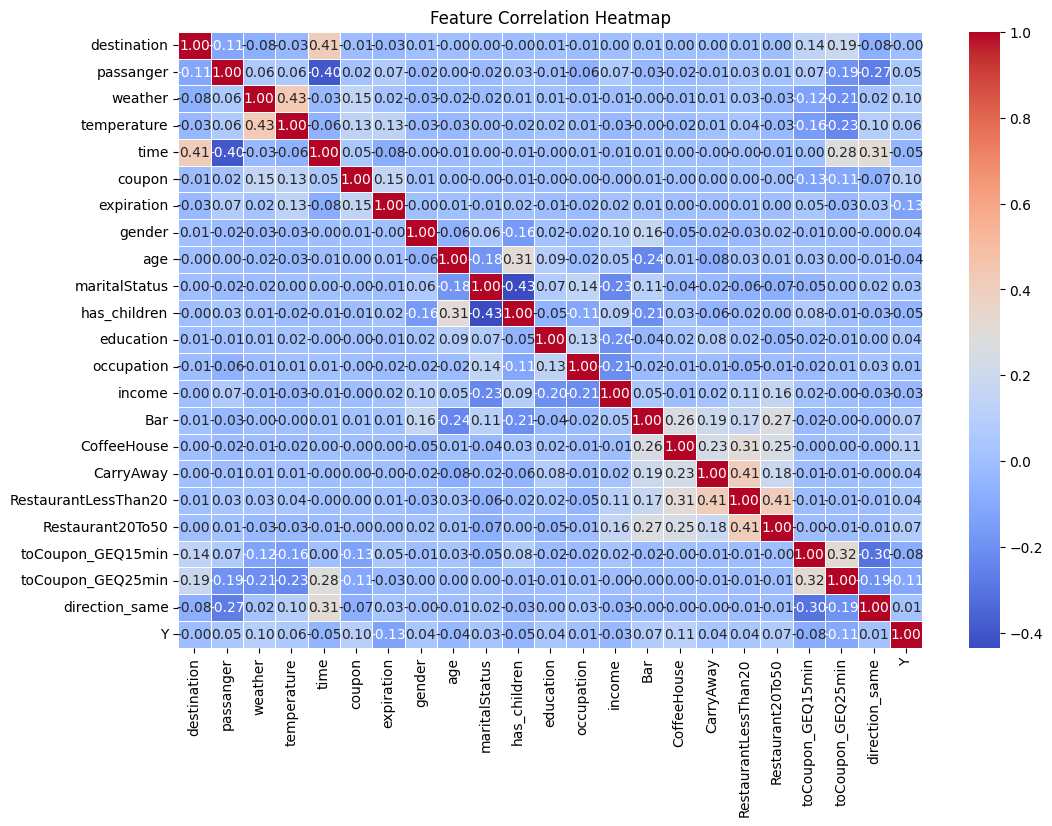

In [35]:
# Plotting Heatmap For analysis
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [36]:
# Identifying Highly Correlated Data
high_corr_features = set()
threshold = 0.5

for col in corr_matrix.columns:
    high_corr = corr_matrix[col][(corr_matrix[col] > threshold) & (corr_matrix[col] < 1)].index.tolist()
    if high_corr:
        high_corr_features.add(col)

print("Highly Correlated Features:", high_corr_features)

Highly Correlated Features: set()


In [37]:
# Since the columns are not highly correlated so keeping all features for training will be good
X = data.drop(columns=["Y"])
y = data["Y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
# Standardlize all the columns to normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Training on Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.6201427438540841
              precision    recall  f1-score   support

           0       0.58      0.46      0.51      1091
           1       0.64      0.75      0.69      1431

    accuracy                           0.62      2522
   macro avg       0.61      0.60      0.60      2522
weighted avg       0.61      0.62      0.61      2522



In [40]:
# Training on RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.7474226804123711
              precision    recall  f1-score   support

           0       0.74      0.65      0.69      1091
           1       0.75      0.82      0.79      1431

    accuracy                           0.75      2522
   macro avg       0.75      0.74      0.74      2522
weighted avg       0.75      0.75      0.74      2522



In [41]:
# Training on XGBClassifier
xgb = XGBClassifier(n_estimators=200, random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred = xgb.predict(X_test_scaled)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

XGBoost Accuracy: 0.7501982553528945
              precision    recall  f1-score   support

           0       0.72      0.69      0.70      1091
           1       0.77      0.80      0.78      1431

    accuracy                           0.75      2522
   macro avg       0.75      0.74      0.74      2522
weighted avg       0.75      0.75      0.75      2522



## Final Analysis

1. We calculated a Correlation Matrix for numerical columns.
2. Then we generated Heatmap for analysis for high correlation between columns.
3. Then we calculated for columns with high correlation (threshold>0.5)
4. No Columns are highly correlated so we will leave the dataset as it is
5. Then we calculate the accuracy for different models after standard scaling, XGB performed best